## Actividad NLP - 2.0 - Aplicación de análisis de sentimientos

##### Andrés Alejandro Guzmán González - A01633819
---


Importación de librerías

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q transformers
from transformers import pipeline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Creación del dataframe con los tweets

Preda, G. (2020). Pfizer Vaccine Tweets. Recuperado de: https://www.kaggle.com/datasets/gpreda/pfizer-vaccine-tweets/

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Archivos_Colab/vaccination_tweets.csv", encoding="latin-1")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
df.shape

(11020, 16)

Extraemos solo los tweets

In [23]:
tweets = df['text'].tolist()
tweets[:30]

['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
 "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've evâ\x80¦ https://t.co/dlCHrZjkhm",
 '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 yearsâ\x80¦ https://t.co/ieYlCKBr8P',
 "Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born iâ\x80¦ https://t.co/jqgV18kch4",
 'Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTechâ\x80¦ https://t.co/KxbSRoBEHq',
 'Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?â\x80¦ https://t.co/EifsyQoeKN',
 'it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK andâ\x80¦ https://t.co/IfMrAyGyTP',
 'There have not

Para eficientar el modelo reducimos el número de tweets y se entrena el modelo.

In [7]:
sentiment_analysis = pipeline("sentiment-analysis")
modelo = sentiment_analysis(tweets[:1500])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Contamos los twwets categorizados como positivos

In [8]:
positivos = 0
negativos = 0
for diccionario in modelo:
    valor = diccionario.get("label")
    if valor == "POSITIVE":
      positivos += 1
    else:
      negativos += 1

Graficación de resultados

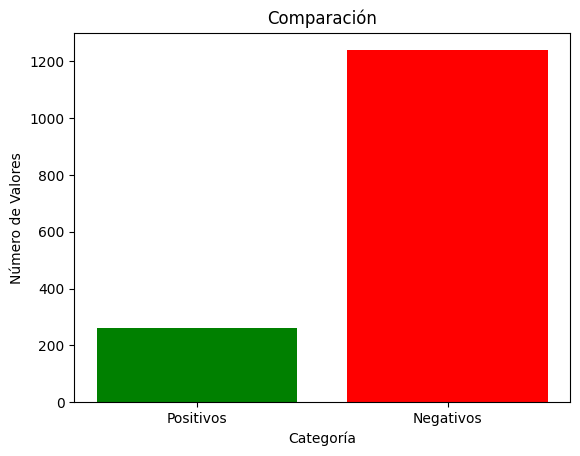

In [9]:
etiquetas = ['Positivos', 'Negativos']
valores = [positivos,negativos]
plt.title("Comparación")

plt.bar(etiquetas, valores, color=['green', 'red'])
plt.xlabel('Categoría')
plt.ylabel('Número de Valores')
plt.show()

In [10]:
sentiment_analysis = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")
modelo = sentiment_analysis(tweets[:1500])

In [11]:
positivos = 0
negativos = 0
neutrales = 0
for diccionario in modelo:
    valor = diccionario.get("label")
    if valor == "LABEL_2":
      positivos += 1
    elif valor == "LABEL_1":
      neutrales += 1
    else:
      negativos = 1

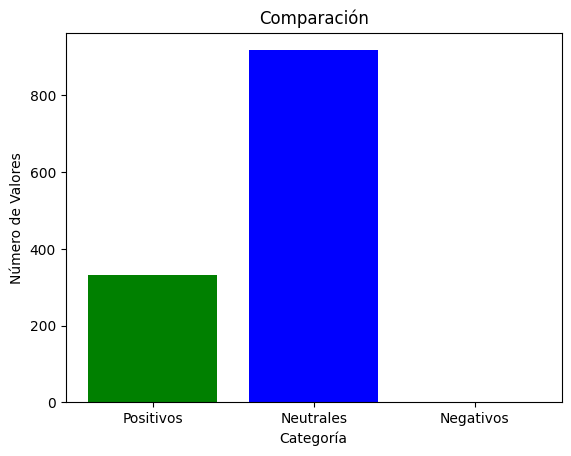

In [12]:
etiquetas = ['Positivos', 'Neutrales', 'Negativos']
valores = [positivos,neutrales,negativos]
plt.title("Comparación")

plt.bar(etiquetas, valores, color=['green','blue', 'red'])
plt.xlabel('Categoría')
plt.ylabel('Número de Valores')
plt.show()

Unimos el corpus en un único string

In [21]:
corpus_completo = '\n'.join(tweets)

Proceso para contar las oraciones totales de los tweets

In [20]:
cantidad_separaciones = corpus_completo.count('.')

print(f'\nCantidad de separaciones: {cantidad_separaciones}')


Cantidad de separaciones: 17543


Considerando que los tweets analizados fueron 1500 podemos concluir que estos son considerablemente algo.